# Model Evaluation Metrics: A Comprehensive Guide

This notebook provides a thorough introduction to evaluation metrics for both regression and classification models. We'll cover the theory behind each metric and demonstrate their practical application using simple linear models.

## Table of Contents
1. [Introduction](#introduction)
2. [Regression Metrics](#regression)
3. [Classification Metrics](#classification)
4. [Summary](#summary)

## Introduction <a id='introduction'></a>

Model evaluation is crucial in machine learning. It helps us understand how well our model performs and whether it's suitable for our task. Different types of problems require different evaluation metrics.

- **Regression**: Predicting continuous values (e.g., house prices, temperature)
- **Classification**: Predicting discrete categories (e.g., spam/not spam, disease diagnosis)

Let's start by importing the necessary libraries.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)

# Set random seed for reproducibility
np.random.seed(42)

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


---
# Part 1: Regression Metrics <a id='regression'></a>

Regression metrics evaluate how well a model predicts continuous numerical values. Let's explore the most common metrics.

## Creating a Regression Dataset

First, let's create a simple dataset for demonstrating regression metrics. We'll generate data with a linear relationship plus some noise.

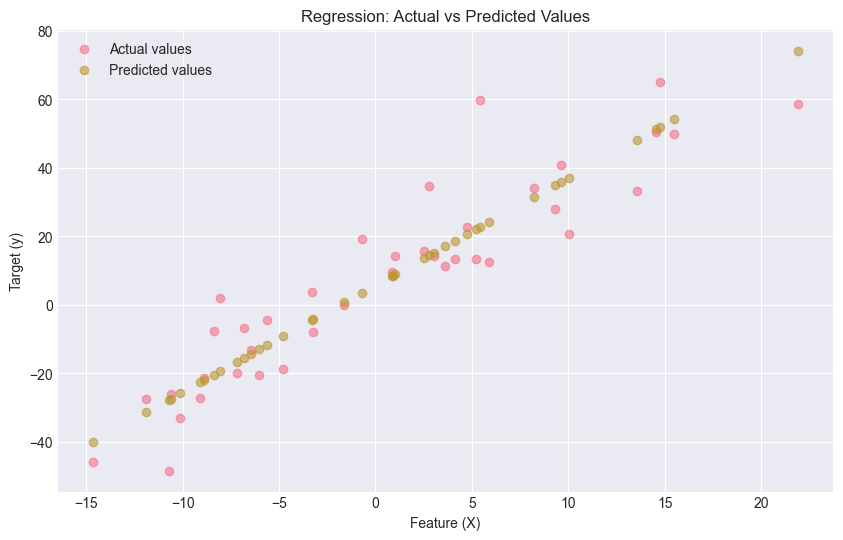

Model coefficients: 3.12
Model intercept: 5.84


In [2]:
# Generate synthetic regression data
# Simulating: y = 3x + 5 + noise
n_samples = 200
X_reg = np.random.randn(n_samples, 1) * 10
y_reg = 3 * X_reg.flatten() + 5 + np.random.randn(n_samples) * 10

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = lr_model.predict(X_test_reg)

# Visualize the data and predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reg, y_test_reg, alpha=0.6, label='Actual values')
plt.scatter(X_test_reg, y_pred_reg, alpha=0.6, label='Predicted values')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Regression: Actual vs Predicted Values')
plt.legend()
plt.show()

print(f"Model coefficients: {lr_model.coef_[0]:.2f}")
print(f"Model intercept: {lr_model.intercept_:.2f}")

## 1. Mean Absolute Error (MAE)

### Theory
MAE measures the average absolute difference between predicted and actual values.

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

Where:
- $n$ = number of samples
- $y_i$ = actual value
- $\hat{y}_i$ = predicted value

**Characteristics:**
- Easy to interpret (same units as the target variable)
- Less sensitive to outliers than MSE
- Range: [0, ∞), lower is better
- All errors weighted equally

In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Manual calculation to understand the formula
manual_mae = np.mean(np.abs(y_test_reg - y_pred_reg))
print(f"Manual MAE calculation: {manual_mae:.2f}")

# Visualize errors
errors = y_test_reg - y_pred_reg
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Perfect predictions')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, errors, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

print(f"\nInterpretation: On average, our predictions are off by {mae:.2f} units.")

## 2. Mean Squared Error (MSE)

### Theory
MSE measures the average squared difference between predicted and actual values.

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Characteristics:**
- Penalizes larger errors more heavily (due to squaring)
- More sensitive to outliers than MAE
- Not in the same units as the target variable (squared units)
- Range: [0, ∞), lower is better
- Differentiable everywhere (useful for optimization)

In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Manual calculation
manual_mse = np.mean((y_test_reg - y_pred_reg) ** 2)
print(f"Manual MSE calculation: {manual_mse:.2f}")

# Demonstrate the effect of outliers
# Compare MAE and MSE with and without an outlier
errors_example = np.array([1, 2, 3, 4, 5])  # Small errors
errors_with_outlier = np.array([1, 2, 3, 4, 50])  # One large error

mae_no_outlier = np.mean(np.abs(errors_example))
mse_no_outlier = np.mean(errors_example ** 2)

mae_with_outlier = np.mean(np.abs(errors_with_outlier))
mse_with_outlier = np.mean(errors_with_outlier ** 2)

print("\n--- Effect of Outliers ---")
print(f"Without outlier - MAE: {mae_no_outlier:.2f}, MSE: {mse_no_outlier:.2f}")
print(f"With outlier    - MAE: {mae_with_outlier:.2f}, MSE: {mse_with_outlier:.2f}")
print(f"\nMAE increased by: {((mae_with_outlier/mae_no_outlier - 1) * 100):.1f}%")
print(f"MSE increased by: {((mse_with_outlier/mse_no_outlier - 1) * 100):.1f}%")
print("\nNotice how MSE is much more sensitive to the outlier!")

## 3. Root Mean Squared Error (RMSE)

### Theory
RMSE is the square root of MSE, bringing the error metric back to the same units as the target variable.

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

**Characteristics:**
- Same units as the target variable (like MAE)
- Still penalizes large errors more than MAE
- More interpretable than MSE
- Range: [0, ∞), lower is better

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Manual calculation
manual_rmse = np.sqrt(np.mean((y_test_reg - y_pred_reg) ** 2))
print(f"Manual RMSE calculation: {manual_rmse:.2f}")

# Compare all three metrics
print("\n--- Comparison of Error Metrics ---")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE:  {mse:.2f}")

# Visualization
metrics_comparison = pd.DataFrame({
    'Metric': ['MAE', 'RMSE'],
    'Value': [mae, rmse]
})

plt.figure(figsize=(8, 5))
plt.bar(metrics_comparison['Metric'], metrics_comparison['Value'], alpha=0.7)
plt.ylabel('Error Value')
plt.title('Comparison of MAE and RMSE')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(metrics_comparison['Value']):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold')
plt.show()

print(f"\nNote: RMSE ({rmse:.2f}) > MAE ({mae:.2f})")
print("This is always true when there's variability in errors.")

## 4. R-squared (R² or Coefficient of Determination)

### Theory
R² represents the proportion of variance in the dependent variable that is predictable from the independent variable(s).

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

Where:
- $SS_{res}$ = Sum of Squares of Residuals (unexplained variance)
- $SS_{tot}$ = Total Sum of Squares (total variance)
- $\bar{y}$ = mean of actual values

**Characteristics:**
- Range: (-∞, 1], where 1 is perfect prediction
- 0 means the model performs as well as predicting the mean
- Negative values mean the model performs worse than predicting the mean
- Scale-independent (unitless)
- Can be misleading with multiple features (use Adjusted R² instead)

In [ ]:
# Calculate R²
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R-squared (R²): {r2:.4f}")

# Manual calculation to understand the formula
ss_res = np.sum((y_test_reg - y_pred_reg) ** 2)  # Residual sum of squares
ss_tot = np.sum((y_test_reg - np.mean(y_test_reg)) ** 2)  # Total sum of squares
manual_r2 = 1 - (ss_res / ss_tot)
print(f"Manual R² calculation: {manual_r2:.4f}")

print(f"\nInterpretation: {r2*100:.2f}% of the variance in the target variable")
print("is explained by our model.")

# Visualize the concept of R²
plt.figure(figsize=(14, 5))

# Plot 1: Predictions vs Actual
plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', linewidth=2, label='Perfect predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predictions vs Actual (R² = {r2:.3f})')
plt.legend()

# Plot 2: Baseline (mean) prediction
plt.subplot(1, 3, 2)
mean_baseline = np.full_like(y_test_reg, np.mean(y_test_reg))
plt.scatter(y_test_reg, mean_baseline, alpha=0.6, label='Baseline (mean)')
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', linewidth=2, label='Perfect predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Baseline Model (Always predicts mean)')
plt.legend()

# Plot 3: R² comparison
plt.subplot(1, 3, 3)
baseline_r2 = r2_score(y_test_reg, mean_baseline)
models = ['Baseline\n(Mean)', 'Our Model']
r2_scores = [baseline_r2, r2]
colors = ['lightcoral', 'lightgreen']
plt.bar(models, r2_scores, color=colors, alpha=0.7)
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.ylim([-0.1, 1.1])
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=1, color='green', linestyle='--', linewidth=1, alpha=0.3)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.05, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nBaseline R²: {baseline_r2:.4f} (always predicts the mean)")
print(f"Our Model R²: {r2:.4f}")
print(f"Improvement: {(r2 - baseline_r2):.4f}")

## 5. Adjusted R-squared

### Theory
Adjusted R² modifies R² to account for the number of predictors in the model. It penalizes the addition of unnecessary features.

$$R^2_{adj} = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}$$

Where:
- $n$ = number of samples
- $p$ = number of predictors (features)
- $R^2$ = R-squared value

**Characteristics:**
- Always lower than or equal to R²
- Better for comparing models with different numbers of features
- Penalizes overfitting
- More reliable for multiple regression

In [ ]:
# Calculate Adjusted R²
n = len(y_test_reg)
p = X_test_reg.shape[1]  # number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")
print(f"\nNumber of samples (n): {n}")
print(f"Number of features (p): {p}")

# Demonstrate why Adjusted R² matters
print("\n--- Why Adjusted R² Matters ---")
print("When we add more features:")
print("- R² can only increase (or stay the same)")
print("- Adjusted R² can decrease if the new feature doesn't add value")
print("- This helps prevent overfitting")

# Simulate adding irrelevant features
n_irrelevant_features = 10
X_with_noise = np.concatenate([
    X_train_reg, 
    np.random.randn(len(X_train_reg), n_irrelevant_features)
], axis=1)
X_test_with_noise = np.concatenate([
    X_test_reg, 
    np.random.randn(len(X_test_reg), n_irrelevant_features)
], axis=1)

# Train model with irrelevant features
lr_noise = LinearRegression()
lr_noise.fit(X_with_noise, y_train_reg)
y_pred_noise = lr_noise.predict(X_test_with_noise)

r2_noise = r2_score(y_test_reg, y_pred_noise)
p_noise = X_test_with_noise.shape[1]
adjusted_r2_noise = 1 - (1 - r2_noise) * (n - 1) / (n - p_noise - 1)

print(f"\nWith {n_irrelevant_features} irrelevant features added:")
print(f"R²: {r2:.4f} → {r2_noise:.4f} (change: {r2_noise - r2:+.4f})")
print(f"Adj R²: {adjusted_r2:.4f} → {adjusted_r2_noise:.4f} (change: {adjusted_r2_noise - adjusted_r2:+.4f})")
print("\nNotice: R² slightly increased, but Adjusted R² decreased!")
print("This indicates the added features don't improve the model.")

## Regression Metrics Summary

Let's summarize all regression metrics for our model:

In [ ]:
# Create a summary table
regression_summary = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'Adjusted R²'],
    'Value': [mae, mse, rmse, r2, adjusted_r2],
    'Best Value': ['0', '0', '0', '1', '1'],
    'Units': ['same as target', 'squared target units', 'same as target', 'unitless', 'unitless'],
    'Outlier Sensitivity': ['Low', 'High', 'High', 'Medium', 'Medium']
})

print("\n=== REGRESSION METRICS SUMMARY ===")
print(regression_summary.to_string(index=False))

print("\n--- When to Use Each Metric ---")
print("\nMAE:")
print("  ✓ When you want intuitive interpretation")
print("  ✓ When outliers should be treated equally")
print("  ✓ When errors are expected to be normally distributed")

print("\nMSE/RMSE:")
print("  ✓ When large errors are particularly undesirable")
print("  ✓ When using gradient-based optimization")
print("  ✓ RMSE preferred over MSE for interpretation")

print("\nR²:")
print("  ✓ When you want to understand explained variance")
print("  ✓ When comparing models on the same dataset")
print("  ✓ When interpretation is more important than absolute error")

print("\nAdjusted R²:")
print("  ✓ When comparing models with different numbers of features")
print("  ✓ When preventing overfitting is important")
print("  ✓ In multiple regression scenarios")

---
# Part 2: Classification Metrics <a id='classification'></a>

Classification metrics evaluate how well a model predicts discrete categories. Let's explore the most important metrics.

## Creating a Classification Dataset

Let's create a binary classification dataset for demonstrating classification metrics.

In [ ]:
# Generate synthetic classification data
from sklearn.datasets import make_classification

X_clf, y_clf = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

# Train a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = log_reg.predict(X_test_clf)
y_pred_proba = log_reg.predict_proba(X_test_clf)[:, 1]  # Probability of class 1

# Visualize the data and decision boundary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test_clf[y_test_clf == 0, 0], X_test_clf[y_test_clf == 0, 1], 
            label='Class 0', alpha=0.6, s=50)
plt.scatter(X_test_clf[y_test_clf == 1, 0], X_test_clf[y_test_clf == 1, 1], 
            label='Class 1', alpha=0.6, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('True Labels')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_clf[y_pred_clf == 0, 0], X_test_clf[y_pred_clf == 0, 1], 
            label='Predicted Class 0', alpha=0.6, s=50, marker='s')
plt.scatter(X_test_clf[y_pred_clf == 1, 0], X_test_clf[y_pred_clf == 1, 1], 
            label='Predicted Class 1', alpha=0.6, s=50, marker='s')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Labels')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Training samples: {len(X_train_clf)}")
print(f"Test samples: {len(X_test_clf)}")
print(f"Class distribution in test set: {np.bincount(y_test_clf)}")

## The Confusion Matrix Foundation

Before diving into individual metrics, let's understand the confusion matrix - the foundation of all classification metrics.

### Theory
A confusion matrix is a table showing the counts of:
- **True Positives (TP)**: Correctly predicted positive class
- **True Negatives (TN)**: Correctly predicted negative class
- **False Positives (FP)**: Incorrectly predicted positive (Type I error)
- **False Negatives (FN)**: Incorrectly predicted negative (Type II error)

```
                 Predicted
                 0      1
Actual    0     TN     FP
          1     FN     TP
```

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)
print(f"\nBreakdown:")
print(f"True Negatives (TN):  {tn} - Correctly predicted Class 0")
print(f"False Positives (FP): {fp} - Wrongly predicted Class 1 (Type I error)")
print(f"False Negatives (FN): {fn} - Wrongly predicted Class 0 (Type II error)")
print(f"True Positives (TP):  {tp} - Correctly predicted Class 1")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add text annotations for clarity
plt.text(0.5, 0.25, f'TN\n{tn}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(1.5, 0.25, f'FP\n{fp}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(0.5, 1.25, f'FN\n{fn}', ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(1.5, 1.25, f'TP\n{tp}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal correct predictions: {tn + tp}")
print(f"Total incorrect predictions: {fp + fn}")
print(f"Total samples: {tn + fp + fn + tp}")

## 1. Accuracy

### Theory
Accuracy measures the proportion of correct predictions out of all predictions.

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

**Characteristics:**
- Range: [0, 1], higher is better
- Easy to understand and interpret
- **Problem**: Misleading with imbalanced datasets
- Treats all errors equally

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Manual calculation
manual_accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Manual accuracy calculation: {manual_accuracy:.4f}")

print(f"\nInterpretation: The model correctly classified {accuracy*100:.2f}% of samples.")

# Demonstrate the imbalanced data problem
print("\n--- Problem: Imbalanced Data ---")
print("Imagine a dataset where 95% of samples are Class 0:")
print("A 'dumb' model that always predicts Class 0 would have 95% accuracy!")
print("This is why we need other metrics.")

# Simulate imbalanced scenario
imbalanced_size = 1000
y_true_imbalanced = np.concatenate([np.zeros(950), np.ones(50)])
y_pred_all_zero = np.zeros(imbalanced_size)  # Always predict Class 0

accuracy_dumb = accuracy_score(y_true_imbalanced, y_pred_all_zero)
print(f"\nDumb model (always predicts 0) accuracy: {accuracy_dumb:.4f} ({accuracy_dumb*100:.1f}%)")
print("But it missed ALL positive cases!")

## 2. Precision

### Theory
Precision (also called Positive Predictive Value) measures the proportion of positive predictions that were actually correct.

$$Precision = \frac{TP}{TP + FP}$$

**Answers the question**: "Of all samples predicted as positive, how many were truly positive?"

**Characteristics:**
- Range: [0, 1], higher is better
- Focuses on minimizing false positives
- Important when false positives are costly
- **Use case**: Email spam detection (don't want to flag legitimate emails as spam)

In [ ]:
# Calculate precision
precision = precision_score(y_test_clf, y_pred_clf)
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")

# Manual calculation
manual_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"Manual precision calculation: {manual_precision:.4f}")

print(f"\nInterpretation: Of all samples predicted as positive (Class 1),")
print(f"{precision*100:.2f}% were actually positive.")

print(f"\nOut of {tp + fp} positive predictions:")
print(f"  ✓ {tp} were correct (True Positives)")
print(f"  ✗ {fp} were wrong (False Positives)")

# Real-world example
print("\n--- Real-World Example: Spam Detection ---")
print("High precision means: When we flag an email as spam, we're usually right.")
print("Low precision means: We're flagging too many legitimate emails as spam.")
print("\nIn spam detection, FALSE POSITIVES are costly:")
print("  - Missing an important email is worse than receiving spam")
print("  - So we want HIGH PRECISION")

## 3. Recall (Sensitivity)

### Theory
Recall (also called Sensitivity, True Positive Rate, or Hit Rate) measures the proportion of actual positive samples that were correctly identified.

$$Recall = \frac{TP}{TP + FN}$$

**Answers the question**: "Of all actual positive samples, how many did we correctly identify?"

**Characteristics:**
- Range: [0, 1], higher is better
- Focuses on minimizing false negatives
- Important when false negatives are costly
- **Use case**: Disease diagnosis (don't want to miss sick patients)

In [ ]:
# Calculate recall
recall = recall_score(y_test_clf, y_pred_clf)
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")

# Manual calculation
manual_recall = tp / (tp + fn) if (tp + fn) > 0 else 0
print(f"Manual recall calculation: {manual_recall:.4f}")

print(f"\nInterpretation: Of all actual positive samples (Class 1),")
print(f"we correctly identified {recall*100:.2f}%.")

print(f"\nOut of {tp + fn} actual positive samples:")
print(f"  ✓ {tp} were correctly identified (True Positives)")
print(f"  ✗ {fn} were missed (False Negatives)")

# Real-world example
print("\n--- Real-World Example: Cancer Detection ---")
print("High recall means: We catch most cancer cases.")
print("Low recall means: We're missing too many cancer cases.")
print("\nIn cancer detection, FALSE NEGATIVES are costly:")
print("  - Missing a cancer diagnosis can be fatal")
print("  - So we want HIGH RECALL")
print("  - Even if it means more false alarms (lower precision)")

## Precision vs Recall Trade-off

There's typically a trade-off between precision and recall. Let's visualize this:

In [ ]:
# Calculate precision and recall at different thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_clf, y_pred_proba)

plt.figure(figsize=(14, 5))

# Plot 1: Precision and Recall vs Threshold
plt.subplot(1, 3, 1)
plt.plot(thresholds, precisions[:-1], label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], label='Recall', linewidth=2)
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recalls, precisions, linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)

# Plot 3: Current model's position
plt.subplot(1, 3, 3)
plt.scatter([recall], [precision], s=200, c='red', zorder=5, 
            label=f'Current Model\n(P={precision:.2f}, R={recall:.2f})', marker='*')
plt.plot(recalls, precisions, linewidth=2, alpha=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Model Performance')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("--- Understanding the Trade-off ---")
print("\nAs we move the classification threshold:")
print("  • Lower threshold → More positive predictions")
print("    - Higher Recall (catch more positives)")
print("    - Lower Precision (more false positives)")
print("\n  • Higher threshold → Fewer positive predictions")
print("    - Higher Precision (more confident predictions)")
print("    - Lower Recall (miss more positives)")
print("\nThe optimal threshold depends on your application!")

## 4. F1-Score

### Theory
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both.

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} = \frac{2TP}{2TP + FP + FN}$$

**Why harmonic mean?** It penalizes extreme values more than the arithmetic mean.

**Characteristics:**
- Range: [0, 1], higher is better
- Balances precision and recall
- Useful when class distribution is imbalanced
- Best when you need both high precision AND high recall

In [ ]:
# Calculate F1-score
f1 = f1_score(y_test_clf, y_pred_clf)
print(f"F1-Score: {f1:.4f}")

# Manual calculation
manual_f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f"Manual F1 calculation: {manual_f1:.4f}")

# Alternative formula
manual_f1_alt = (2 * tp) / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0
print(f"Manual F1 (alternative formula): {manual_f1_alt:.4f}")

print(f"\nInterpretation: F1-score balances precision ({precision:.4f}) ")
print(f"and recall ({recall:.4f}) into a single metric.")

# Demonstrate why harmonic mean is used
print("\n--- Why Harmonic Mean? ---")
example_cases = [
    (0.9, 0.9, "Balanced case"),
    (1.0, 0.5, "High precision, low recall"),
    (0.5, 1.0, "Low precision, high recall"),
    (0.1, 0.9, "Very imbalanced")
]

for prec, rec, description in example_cases:
    harmonic = 2 * (prec * rec) / (prec + rec)
    arithmetic = (prec + rec) / 2
    print(f"\n{description}:")
    print(f"  Precision: {prec:.2f}, Recall: {rec:.2f}")
    print(f"  Arithmetic mean: {arithmetic:.2f}")
    print(f"  Harmonic mean (F1): {harmonic:.2f}")
    print(f"  → Harmonic mean penalizes imbalance!")

# Visualize precision, recall, and F1
plt.figure(figsize=(8, 6))
metrics_names = ['Precision', 'Recall', 'F1-Score']
metrics_values = [precision, recall, f1]
colors = ['skyblue', 'lightcoral', 'lightgreen']

bars = plt.bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black')
plt.ylim([0, 1.1])
plt.ylabel('Score')
plt.title('Classification Metrics Comparison', fontsize=14, fontweight='bold')
plt.axhline(y=1.0, color='green', linestyle='--', alpha=0.3, linewidth=1)

for i, (name, value) in enumerate(zip(metrics_names, metrics_values)):
    plt.text(i, value + 0.03, f'{value:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. ROC Curve and AUC

### Theory
The ROC (Receiver Operating Characteristic) curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings.

$$TPR (Recall) = \frac{TP}{TP + FN}$$

$$FPR = \frac{FP}{FP + TN}$$

**AUC (Area Under the Curve)** summarizes the ROC curve into a single number.

**Characteristics:**
- AUC Range: [0, 1]
  - 0.5 = random classifier (diagonal line)
  - 1.0 = perfect classifier
  - < 0.5 = worse than random (inverted predictions)
- Threshold-independent metric
- Good for imbalanced datasets
- Measures the model's ability to distinguish between classes

In [ ]:
# Calculate ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test_clf, y_pred_proba)
roc_auc = roc_auc_score(y_test_clf, y_pred_proba)

print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(14, 5))

# Plot 1: ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# Plot 2: Threshold effect on TPR and FPR
plt.subplot(1, 3, 2)
plt.plot(roc_thresholds, tpr[:-1], label='True Positive Rate', linewidth=2)
plt.plot(roc_thresholds, fpr[:-1], label='False Positive Rate', linewidth=2)
plt.xlabel('Classification Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs Threshold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: AUC interpretation
plt.subplot(1, 3, 3)
plt.fill_between(fpr, tpr, alpha=0.3, label=f'AUC = {roc_auc:.3f}')
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC: Area Under ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n--- Interpreting ROC-AUC ---")
print(f"AUC = {roc_auc:.4f}")
if roc_auc >= 0.9:
    print("  → Excellent classification")
elif roc_auc >= 0.8:
    print("  → Good classification")
elif roc_auc >= 0.7:
    print("  → Fair classification")
elif roc_auc >= 0.6:
    print("  → Poor classification")
else:
    print("  → No discrimination (barely better than random)")

print("\nWhat AUC means:")
print(f"  {roc_auc*100:.1f}% chance that the model will rank a random")
print("  positive example higher than a random negative example.")

print("\n--- When to Use ROC-AUC ---")
print("✓ When you care about ranking predictions")
print("✓ When working with imbalanced datasets")
print("✓ When you want a threshold-independent metric")
print("✗ When you need to choose a specific threshold")
print("✗ When the cost of FP and FN are very different")

## Classification Report

Sklearn provides a convenient classification report that shows multiple metrics:

In [ ]:
# Generate classification report
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test_clf, y_pred_clf, target_names=['Class 0', 'Class 1']))

print("\n--- Understanding the Report ---")
print("\nPer-class metrics:")
print("  • Precision: Of predictions for this class, how many were correct?")
print("  • Recall: Of actual instances of this class, how many did we find?")
print("  • F1-score: Harmonic mean of precision and recall")
print("  • Support: Number of actual instances of this class")

print("\nAveraged metrics:")
print("  • Macro avg: Unweighted mean (treats all classes equally)")
print("  • Weighted avg: Weighted by number of instances per class")

## Classification Metrics Summary

Let's create a comprehensive summary:

In [ ]:
# Summary table
classification_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Value': [
        f"{accuracy:.4f}",
        f"{precision:.4f}",
        f"{recall:.4f}",
        f"{f1:.4f}",
        f"{roc_auc:.4f}"
    ],
    'Best Value': ['1.0', '1.0', '1.0', '1.0', '1.0'],
    'Focuses On': [
        'Overall correctness',
        'Minimizing false positives',
        'Minimizing false negatives',
        'Balance of precision & recall',
        'Ranking ability'
    ]
})

print("\n=== CLASSIFICATION METRICS SUMMARY ===")
print(classification_summary.to_string(index=False))

print("\n--- Choosing the Right Metric ---")

print("\n1. ACCURACY")
print("   Use when: Classes are balanced")
print("   Example: Coin flip prediction")
print("   Avoid when: Classes are imbalanced (e.g., fraud detection)")

print("\n2. PRECISION")
print("   Use when: False positives are costly")
print("   Example: Spam detection (don't flag legitimate emails)")
print("   Question: 'When I predict positive, am I usually right?'")

print("\n3. RECALL")
print("   Use when: False negatives are costly")
print("   Example: Cancer detection (don't miss sick patients)")
print("   Question: 'Am I finding all the positive cases?'")

print("\n4. F1-SCORE")
print("   Use when: Need balance between precision and recall")
print("   Example: Most imbalanced classification problems")
print("   Best for: Comparing models on imbalanced data")

print("\n5. ROC-AUC")
print("   Use when: Want threshold-independent evaluation")
print("   Example: Comparing different models")
print("   Best for: Understanding model's discriminative ability")

print("\n--- Real-World Scenarios ---")

scenarios = [
    ("Email Spam Filter", "High Precision", "Don't mark real emails as spam"),
    ("Cancer Screening", "High Recall", "Don't miss any cancer cases"),
    ("Fraud Detection", "High F1", "Balance catching fraud vs. false alarms"),
    ("Customer Churn", "High ROC-AUC", "Rank customers by churn probability"),
]

for scenario, metric, reason in scenarios:
    print(f"\n{scenario}:")
    print(f"  → Optimize for: {metric}")
    print(f"  → Why: {reason}")

---
# Summary and Key Takeaways <a id='summary'></a>

## Regression Metrics Recap

| Metric | Formula | When to Use | Key Insight |
|--------|---------|-------------|-------------|
| **MAE** | Mean of absolute errors | Intuitive interpretation needed | Same units as target, less sensitive to outliers |
| **MSE** | Mean of squared errors | Mathematical optimization | Heavily penalizes large errors |
| **RMSE** | Square root of MSE | Interpretable error metric | Same units as target, sensitive to outliers |
| **R²** | 1 - (SS_res/SS_tot) | Understanding explained variance | Scale-independent, 0 to 1 range |
| **Adj. R²** | R² adjusted for features | Comparing models with different features | Prevents overfitting |

## Classification Metrics Recap

| Metric | Formula | When to Use | Key Insight |
|--------|---------|-------------|-------------|
| **Accuracy** | (TP+TN)/Total | Balanced datasets | Simple but can be misleading |
| **Precision** | TP/(TP+FP) | Minimize false positives | "Of predictions, how many correct?" |
| **Recall** | TP/(TP+FN) | Minimize false negatives | "Of actuals, how many found?" |
| **F1-Score** | 2×(P×R)/(P+R) | Balance P and R | Harmonic mean penalizes extremes |
| **ROC-AUC** | Area under ROC curve | Threshold-independent | Ranking/discrimination ability |

## Key Concepts to Remember

### Regression
1. **Error Magnitude**: MAE and RMSE tell you *how much* you're wrong
2. **Explained Variance**: R² tells you *how well* you explain the data
3. **Outlier Sensitivity**: MSE/RMSE are more sensitive than MAE
4. **Overfitting**: Use Adjusted R² when adding features

### Classification
1. **Confusion Matrix**: Foundation of all classification metrics
2. **Precision-Recall Trade-off**: You can't always maximize both
3. **Context Matters**: Choose metrics based on cost of errors
4. **Imbalanced Data**: Accuracy alone is misleading
5. **Threshold Selection**: ROC-AUC evaluates all thresholds at once

## Final Advice

### For Regression:
- Start with RMSE and R² for most problems
- Use MAE if outliers shouldn't dominate
- Always use Adjusted R² when comparing models with different numbers of features
- Consider the domain: sometimes business metrics matter more than statistical ones

### For Classification:
- Never rely on accuracy alone, especially with imbalanced data
- Think about the **cost** of false positives vs false negatives
- Use F1-score as a general-purpose metric for imbalanced data
- Use ROC-AUC when you need to compare models without picking a threshold
- Always look at the confusion matrix to understand your errors

## Practice Exercises

Try these to reinforce your learning:

1. **Regression**: Create a dataset with outliers and compare MAE vs RMSE
2. **Classification**: Adjust the classification threshold and observe changes in precision/recall
3. **Real-world**: Think of 3 applications and determine which metric is most important
4. **Imbalanced Data**: Create a 99:1 imbalanced dataset and see why accuracy fails

## Additional Resources

- Scikit-learn Documentation: https://scikit-learn.org/stable/modules/model_evaluation.html
- Understanding Precision-Recall: https://developers.google.com/machine-learning/crash-course/classification
- Cross-validation techniques for better evaluation

---

**Remember**: Metrics are tools to guide your modeling decisions. Always understand what you're measuring and why it matters for your specific problem!

## Exercise Section (Try It Yourself!)

Now it's your turn! Try modifying the code cells above or create new ones to:

1. Change the threshold in the logistic regression model and observe how metrics change
2. Create a more imbalanced dataset and see the effect on different metrics
3. Add more features to the regression model and compare R² vs Adjusted R²
4. Try different types of errors in regression and see which metric captures them best

Happy learning! 🚀